In [1]:
from pandas import read_csv, Categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.losses import Loss
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

2022-02-01 22:19:59.844837: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-01 22:19:59.844858: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data = read_csv('short_projects/IRIS/IRIS.csv')
data['species'] = Categorical(data['species']).codes
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
X = data.drop(['species'], axis=1).to_numpy()
y = data['species'].to_numpy()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 4), (75, 4), (75,), (75,))

2022-02-01 22:20:02.007290: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-01 22:20:02.007970: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-01 22:20:02.008040: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-02-01 22:20:02.008103: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-02-01 22:20:02.008166: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

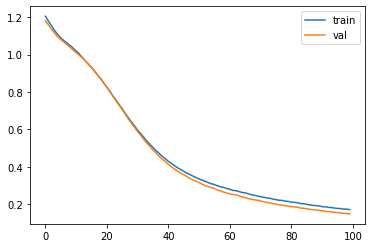

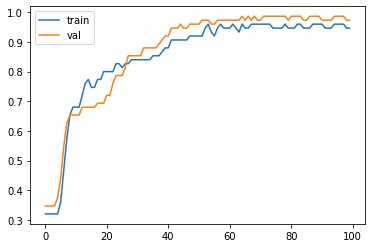

In [5]:
input = Input(shape=(X_train.shape[1], ))
x = Dense(8, activation='relu')(input)
x = Dense(32, activation='relu')(x)
y = Dense(3, activation='softmax')(x)

model = Model(input, y)

# plot_model(model, show_shapes=True, show_layer_names=True, dpi=64)

EPOCHS = 100
BATCH_SIZE = 16

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=[X_test, y_test], verbose=0)

# plt.plot(range(1, EPOCHS+1), history.history['loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.show()

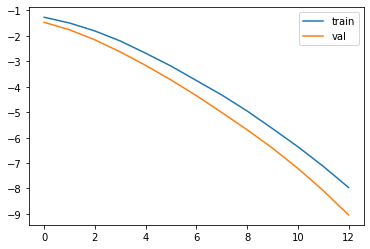

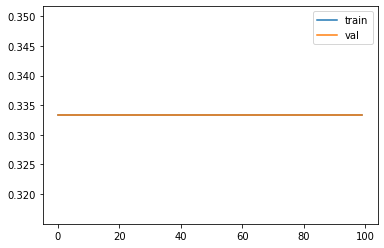

In [25]:
input = Input(shape=(X_train.shape[1], ))
x = Dense(8, activation='relu')(input)
x = Dense(32, activation='relu')(x)
y = Dense(3, activation='softmax')(x)

model = Model(input, y)

plot_model(model, show_shapes=True, show_layer_names=True, dpi=64)

# class myLoss(Loss):
#     def __init__(self, y_true, y_pred):
#         super().__init__()

#     def call(self, y_true, y_pred):
#         return tf.abs(y_true-y_pred)

def myLoss(y_true, y_pred):
    y_true = tf.cast(y_true, y_pred.dtype)
    # print(y_true, y_pred, tf.print(y_true))
    # print(tf.print(y_true), tf.print(y_true))
    return y_true*tf.math.log(y_pred) + (1-y_true)*tf.math.log(1-y_pred)

EPOCHS = 100
BATCH_SIZE = 16

model.compile(optimizer='adam', loss=myLoss, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=[X_test, y_test], verbose=0)

# plt.plot(range(1, EPOCHS+1), history.history['loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.show()